In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing dataset
dataset=pd.read_csv('kc_house_data.csv')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#FITTING LINEAR REGRESSION BEFORE BACKWARD ELIMINATION

In [4]:
X=dataset.iloc[:,3:].values
Y=dataset.iloc[:,2].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [24]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
reg=sm.OLS(Y_train,X_train).fit()

In [9]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2119.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:10:21   Log-Likelihood:            -2.0604e+05
No. Observations:               15129   AIC:                         4.121e+05
Df Residuals:                   15111   BIC:                         4.123e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.964e+06   3.46e+06      0.567      0.5

As we saw above that efficiency is 70 we will perform backward elimination to improve the efficiency

# BACK WARD ELIMINATION

In [21]:
def backward_elimination(x,Sig_Level):#x is the independent variables
    numVars=len(x[0])#number of columns that is number of variables in x.if we just give len(X) we will get row length hence x[0] 
    temp=np.zeros((21613,19)).astype(int)#create a temporary np array of size same as x
    for i in range(0,numVars): #we iterate number as column types.
        regressor_OLS=sm.OLS(Y,x).fit() #we fit the model for all variables
        maxP = max(regressor_OLS.pvalues).astype(float) #we get maximum p vales among all p values
        adjR_before = regressor_OLS.rsquared_adj.astype(float) # we find out r2 value before so that if it decreases we will know removing the variable caused inneficiency
        if(maxP>Sig_Level): #we the max p value is greater than our significance level
            for j in range(0,numVars-i): # we would have removed i number of columns or placed it at end if r2 has decreased hence iterating till num-i is enough
                if (regressor_OLS.pvalues[j].astype(float) == maxP): # to find which is that variable whose p value is max
                    temp[:,j] = x[:, j] #copy that variable to  temp
                    x = np.delete(x, j, 1) #delete that variable from x
                    tmp_regressor = sm.OLS(Y, x).fit() #fit the model without that variable
                    adjR_after = tmp_regressor.rsquared_adj.astype(float) #find r2 for the above model
                    if (adjR_before >= adjR_after): #if this happens that means that model was accurate before removing the variable..hence add that back
                        x_rollback = np.hstack((x, temp[:,[0,j]])) #hstack means add horizontal as it is a column..the variable is added to last
                        x_rollback = np.delete(x_rollback, j, 1)  #delete the original
                        print (regressor_OLS.summary())
                        return x_rollback #if removing max p  valued variable only is not increasing r2..deleting other variables also wont..hence return from the function
                    else:
                        continue
    regressor_OLS.summary()
    return x
            

In [22]:
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17]]
X_Modeled = backward_elimination(X_opt, 0.05)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        22:26:00   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_Modeled,Y,test_size=0.3,random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
final_reg=LinearRegression()
final_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
Y_pred=final_reg.predict(X_test)

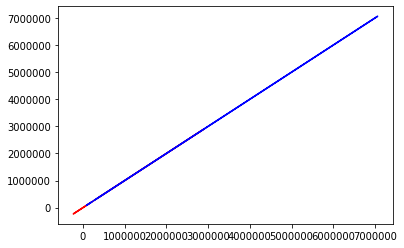

In [42]:
plt.plot(Y_pred,Y_pred,color='red')
plt.plot(Y_test,Y_test,color='blue')
plt.show()

AS WE CAN SEE ABOVE THE PREDICTED VALUES AND TEST VALUES ARE ALMOST SAME